In [3]:
# Importar las librerías necesarias
# Manejo de datos
import numpy as np

# Guardar y cargar modelos
import joblib

# Usar el MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## MFCC

In [4]:
# Cargar los datos de entrenamiento
y_train_mfcc = np.load('data_preprocessed/y_train_mfcc.npy')

# Cargar los datos de prueba
y_test_mfcc = np.load('data_preprocessed/y_test_mfcc.npy')

# Cargar los datos no escalados
X_train_mfcc = np.load('data_preprocessed/X_train_mfcc.npy')
X_test_mfcc = np.load('data_preprocessed/X_test_mfcc.npy')

# Cargar los datos ya escalados
# X_train_mfcc = np.load('data_preprocessed/scalers_PCA/X_train_mfcc_scaled.npy')
# X_test_mfcc = np.load('data_preprocessed/scalers_PCA/X_test_mfcc_scaled.npy')

In [5]:
# Crear y entrenar el modelo MLP
clf_mlp_mfcc = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf_mlp_mfcc.fit(X_train_mfcc, y_train_mfcc)

# Predecir en el conjunto de prueba
y_pred_mlp_mfcc = clf_mlp_mfcc.predict(X_test_mfcc)

# Evaluar el modelo
print("MLP con MFCC - Precisión en prueba:", accuracy_score(y_test_mfcc, y_pred_mlp_mfcc))
print("Reporte de clasificación (MLP con MFCC):")
print(classification_report(y_test_mfcc, y_pred_mlp_mfcc))

# Guardar el modelo MLP con MFCC
joblib.dump(clf_mlp_mfcc, 'models/MLP/mlp_mfcc_model.pkl')

MLP con MFCC - Precisión en prueba: 0.49503668536901163
Reporte de clasificación (MLP con MFCC):
              precision    recall  f1-score   support

           0       0.49      0.96      0.65      2264
           1       0.57      0.05      0.10      2370

    accuracy                           0.50      4634
   macro avg       0.53      0.51      0.37      4634
weighted avg       0.53      0.50      0.37      4634



['models/MLP/mlp_mfcc_model.pkl']

Durante la realización de la memoria se ha vuelto a entrenar el algoritmo y ha bajado aún más la precisión respecto a los valores indicados en la memoria y en el texto existente en el proyecto (los valores de debajo).

La precisión con escalado es 0.50237

La precisión sin escalado es 0.51273

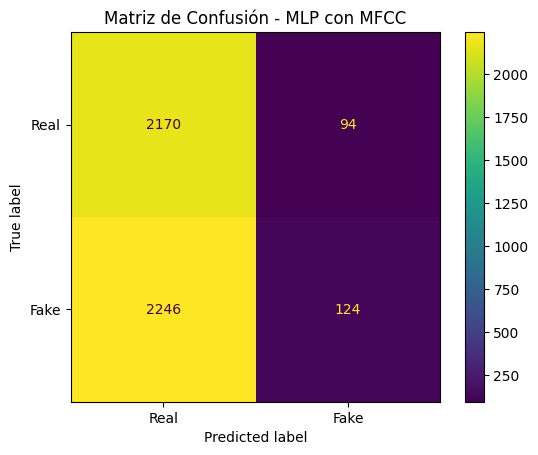

In [6]:
# Matriz de Confusión - MLP con MFCC
cm_mlp_mfcc = confusion_matrix(y_test_mfcc, y_pred_mlp_mfcc)
disp_mlp_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_mfcc, display_labels=['Real', 'Fake'])
disp_mlp_mfcc.plot()
plt.title('Matriz de Confusión - MLP con MFCC')
plt.show()

Ya que los resultados no son buenos, se podría realizar un ajuste de hiperparámetros con GridSearchCV, pero esto llevaría mucho tiempo y no garantiza que se obtenga un buen resultado. Por lo tanto se expone el código sin realizar el computo.

In [ ]:
# Ajuste de hiperparámetros con GridSearchCV (No computada)
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir el espacio de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 500],
    'early_stopping': [True, False],
}

# Crear el modelo base
mlp = MLPClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train_mfcc, y_train_mfcc)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

## Spectrogram

No se ha implementado ya que pesa considerablemente más que el MFCC y en pruebas previas no se ha determinado una mejora significativa en la precisión.

El código presentado a continuación funciona con el espectrograma, pero no se ha ejecutado por carga computacional.

In [ ]:
# Cargar los datos de entrenamiento
y_train_spectrogram = np.load('data_preprocessed/y_train_spectrogram.npy')

# Cargar los datos de prueba
y_test_spectrogram = np.load('data_preprocessed/y_test_spectrogram.npy')

# Cargar los datos con PCA ya aplicado 
X_train_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_train_spectrogram_pca.npy')
X_test_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_test_spectrogram_pca.npy')

In [ ]:
# Crear y entrenar el modelo MLP
clf_mlp_spectrogram = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf_mlp_spectrogram.fit(X_train_spectrogram_pca, y_train_spectrogram)

# Predecir en el conjunto de prueba
y_pred_mlp_spectrogram = clf_mlp_spectrogram.predict(X_test_spectrogram_pca)

# Evaluar el modelo
print("MLP con Espectrograma - Precisión en prueba:", accuracy_score(y_test_spectrogram, y_pred_mlp_spectrogram))
print("Reporte de clasificación (MLP con Espectrograma):")
print(classification_report(y_test_spectrogram, y_pred_mlp_spectrogram))

# Guardar el modelo MLP con espectrogramas
joblib.dump(clf_mlp_spectrogram, 'models/MLP/mlp_spectrogram_model.pkl')

In [ ]:
# Matriz de Confusión - MLP con Espectrograma
cm_mlp_spectrogram = confusion_matrix(y_test_spectrogram, y_pred_mlp_spectrogram)
disp_mlp_spectrogram = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_spectrogram, display_labels=['Real', 'Fake'])
disp_mlp_spectrogram.plot()
plt.title('Matriz de Confusión - MLP con Espectrograma')
plt.show()